<div>
<img src="logo.jpg" width=150 ALIGN="left" style='margin-right:10px; border-style: solid; border-width: 2px;' alt='logo'>
<h1>Starting Kit - Fair-Universe </h1>
<h3>Background and Signal events classification</h3>
<br>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and
examples. This will give you a clear idea of what this challenge is about and how you can
proceed further to solve the challenge.
</p>

<br>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
<p>
This code was tested with Python 3.10.7 | MSC v.1933 64 bit (AMD64) | (default, Jan 23 2023, 14:12:02) <br>
</p>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    <p>
This is a tabular data challenge for <b>Creation of an AI Challenge class</b> at  <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>
</p>
</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

## Introduction

High energy physicists at CERN use simulations in order to reproduce collisions that occurs in the LHC. Collisions between particles create thousands of smaller particles. Once they developped a theory which predicts the existence of a new particle, physicists run these simulations and seek for evidences of the new particle. To do so, they classify all the particles resulting from a collision between background particles (uninteresting ones that they already know) and signal particles (the ones they are interested in). This is why high-energy physicists are working increasingly closely with machine learning scientists.

To perform this classifications task they are tens of available features about each particle (such as its speed, its energy or some angles measurements). However, the simulations are prone to systematic biases and so it is for the data used for classification, which makes the task harder. Thus, a big challenge is to remove this biases from the data in order to improve the accuracy of classification.

The Fair Universe challenge is a toy-exemple for this problem. Instead of working in a high-dimensional feature space, we consider 2D points that belongs either to signal or background class. The aim is to build a model that classifies them correctly.
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
More formaly, this challenge uses 2-features and 1-class datasets
    
The datasets conistst of some points (or events) features:
1. `x1` for $x_1$-coordinate
2. `x2` for $x_2$-coordinate

The `y` column shows the class of the point : either 1 for signal or 0 for background. 
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
However, the data is plagued with bias. That is, there is a nuisance parameter that affects the points coordinates. For this starting-kit, we assume :

1. **the nuisance parameter affects all the points in the same way** (with no regard to their class)
2. the bias is just diagonal translation. That is, if we call $z$ the value of this nuisance parameter, then the actual coordinates in the dataset of each point $(x_1,x_2)$ is $(x_1+z,x_2+z)$

Then, one would legitimately want to simply remove $z$ to the coordinates of each point, but here is the trick : **the value of the nuisance parameter is unknown**
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

**References and credits:**  

 - Université Paris Saclay (https://www.universite-paris-saclay.fr/)  
 - ChaLearn (http://www.chalearn.org/)  
***

### Formalism (can be skipped in first-reading)

Let a **task** be a tuple $\left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$. 

Given a task $T$, we call **parameter** each element of $T$.

A context is a tuple $(\sigma,\theta,l)$.

Given a context $C=(\sigma,\theta,l)$, a **point generated in the context of $C$** is the realization of a random variable that follows a bivariate Gaussian law of parameters $(l\cos\theta,l\sin\theta)$ and $\begin{bmatrix}
    \sigma&0\\
    0&\sigma
\end{bmatrix}$

Given a nuisance direction $\alpha$ and a nuisance value $z$, let $\tau_{\alpha,z} : (\hat{x_1},\hat{x_2}) \mapsto (x_1,x_2) := (x_1+z\cos\alpha,x_2+z\sin\alpha)$.

Given a context $C$, $\alpha$ and $z$, a **labelled event for $z$ in the direction $\alpha$ in the context $C$** is a tuple $(x_1,x_2,c)$, where $(x_1,x_2)$ is the image by $\tau_{\alpha,z}$ of a point generated in the context of $C$.

Given a task $T = \left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$ and $z$, a **dataset for $T$ plagued by $z$** is a set containing $2000p$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_b,\theta,l)$ and $2000(1-p)$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_s,\theta,l)$.

For each labelled event $(x_1,x_2,c)$, we define its associated **event** $(x_1,x_2)$ and its **class** $c$.

The aim of this challenge is to build a learning model that, for any task, most accurately predicts the class of events no matter what nuisance value was used to generate them.

That is, your model has to be :
- in one hand, insensitive to the nuisance parameter $z$
- in the other hand, compliant to any task.

***
### Summary
The aim is to classify 2D data-points into signal or background classes. To do so, you are provided with several datasets, generated with different values of the nuissance parameter $z$. 

***

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sys import path

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Directories

In [2]:
model_dir = 'sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

### Add directories to path

In [3]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../Data_Generator")

***
# 0 - Generate Data
***

**Imports**

In [4]:
from data_loader import get_settings_from_json
from data_generator_new import DataGenerator

In [5]:
data_gen_settings = get_settings_from_json()
# data_gen_settings = [data_gen_settings[-1]]
for index, settings in enumerate(data_gen_settings):
    data_gen = DataGenerator(settings_dict=settings)
    data_gen.load_settings()
    data_gen.generate_data()
    data_gen.save_data(directory="sample_data", file_index=index+1)
    

***
# 1 - Import Data
***

In the previous step, we have generated 6 datasets, each having an unbiased train set and a biased test set. The bias is added by translating the test distribution with a certain value of nuissance parameter $z$.

Each dataset consists of 1800 train samples and 200 test samples. Each sample belongs to either class *background* or *signal*. Both signal and background points ar 2D and generated using Gaussian distributions using different parameters of each class.



**Classes**:
- Background (0)
- Signal (1)

The data generated in previous step is stores in the directory `sample_data`. This data is used in this notebook to 
- uderstand the problem
- use baselines
- produce predictions
- compute scores
- create submission files

In order to produce a submission with real data, dowload `public_data` from the challenge website.

**Note:**  
For `sample_data` we have provided the distribution parameters $\mu$ and $\sigma$ and the nuissance parameter $z$ but for `public_data` these parameters will not be provided.

In [6]:
from data_io import load_data, show_data_statistics, write

In [7]:
data_name = 'fair_universe_challenge'
data_dir = 'sample_data' 

In [8]:
train_sets, test_sets, settings = load_data(data_dir, load_settings=True)



###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  sample_data
[*] train data dir :  sample_data/train/data
[*] train labels dir :  sample_data/train/labels
[*] test data dir :  sample_data/test/data
[*] test labels dir :  sample_data/test/labels
[*] settings dir :  sample_data/settings
[+] train data dir found
[+] train labels dir found
[+] test data dir found
[+] test labels dir found
[+] settings dir found
[+] 6 train and test sets found
---------------------------------
[+] Train and Test data loaded!
---------------------------------




### Data Statistics

In [9]:
show_data_statistics(train_sets, name="Train")

###-------------------------------------###
### Data Statistics Train
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


In [10]:
show_data_statistics(test_sets, name="Test")

###-------------------------------------###
### Data Statistics Test
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


**Data Visualization**

In [11]:
from visualize import (
    visualize_decicion_boundary,
    visualize_augmented_data,
    visualize_data
)

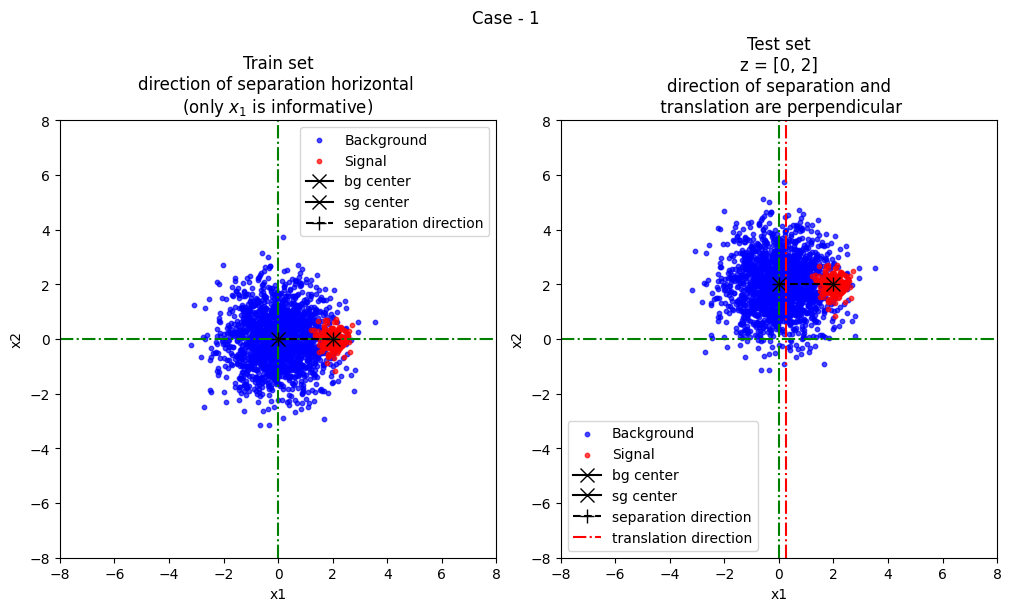

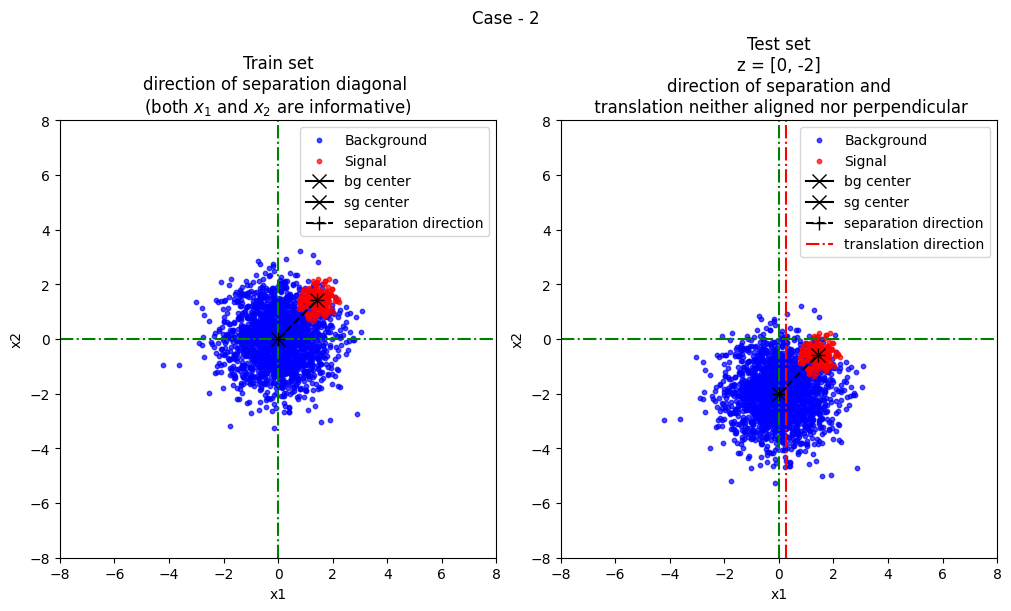

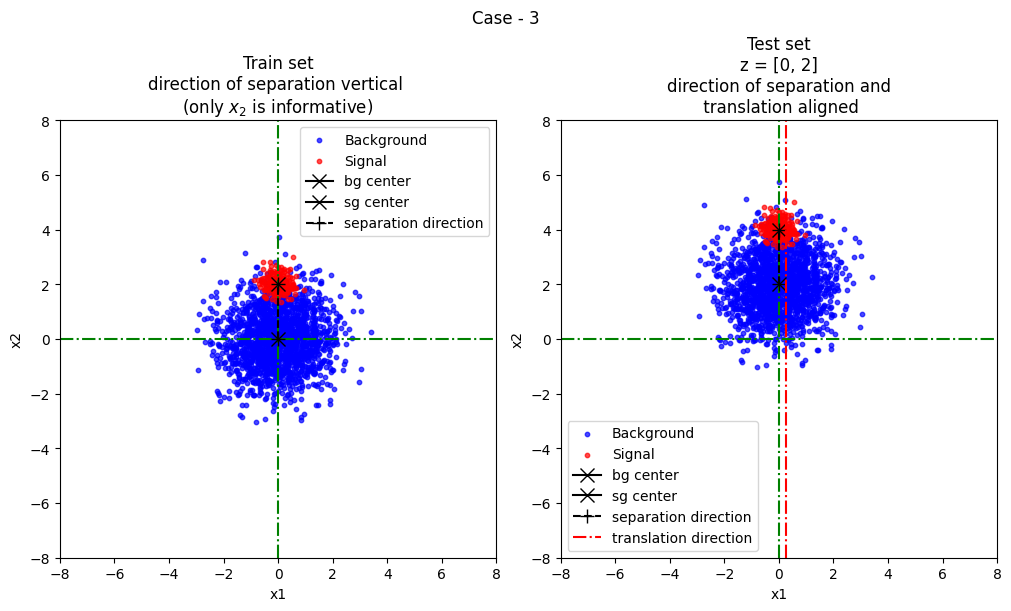

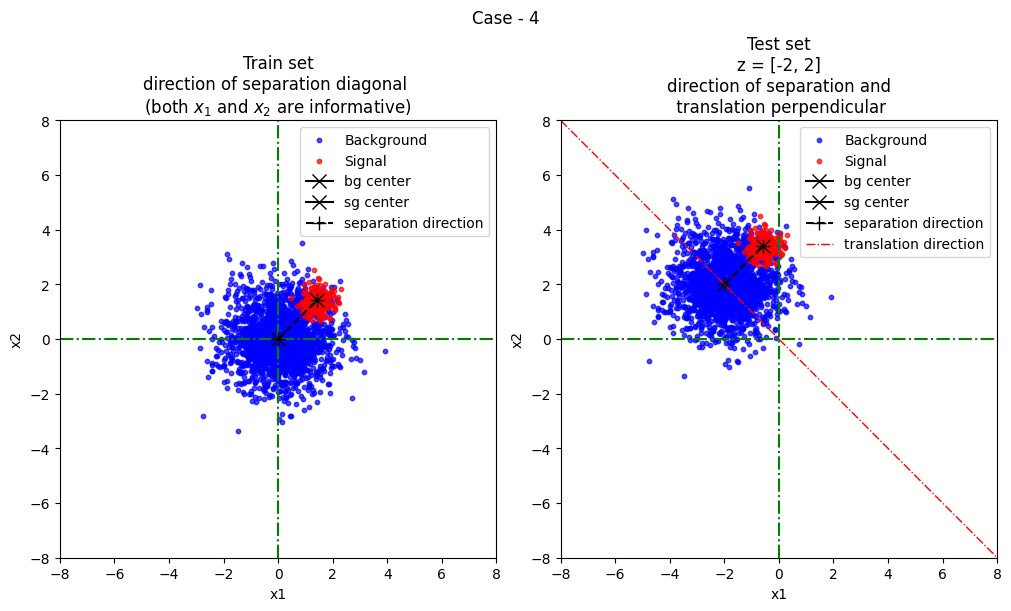

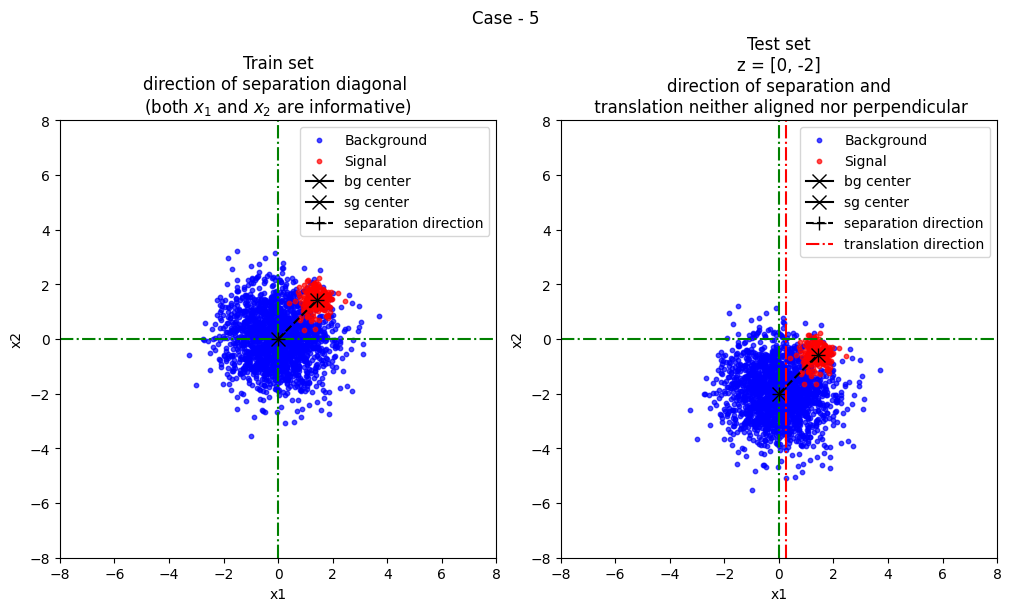

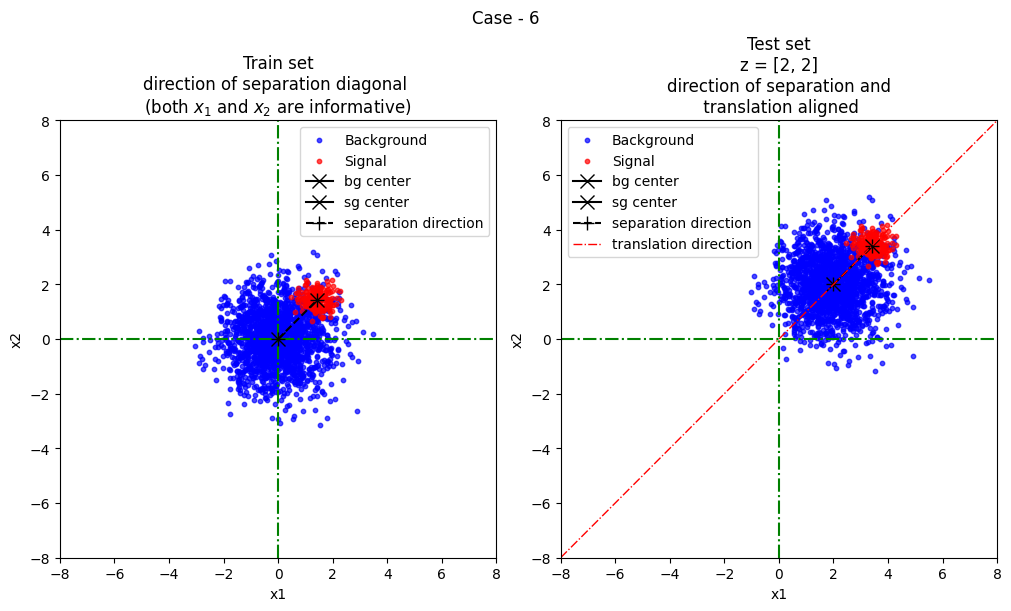

In [12]:
for index, _ in enumerate(train_sets):
    visualize_data(settings[index], train_sets[index], test_sets[index])

***
# 2 - Baselines
***

In this section, we introduced three baselinse to tackle the problem:

- Constant baseline (constant predictions: predicts background)
- Naive Bayes without data augmentation
- Naive Bayes with data augmentation

### Constant Baseline
Here we have a dubm model which does not train and produces predictions which are just zeros

**Load Model**

In [13]:
# Import Dumb baseline
from constant import Model

# Load constant baseline
constant_model = Model()

**Load Data**

In [14]:
# Load Test Data
X_Tests = [test_set["data"] for test_set in test_sets]

**Get Predictions**

In [15]:
# Get Predictions
constant_Y_hat_tests = [constant_model.predict(X_Test) for X_Test in X_Tests]

# Get Scores
constant_Y_hat_score_tests = [constant_model.predict_score(X_Test) for X_Test in X_Tests]

**Save Predictions**

In [16]:
# result directory 
predictions_dir = os.path.join(result_dir, "dumb")

# create result directory if not created
if not os.path.exists(predictions_dir):
    os.mkdir(predictions_dir) 


for index, _ in enumerate(constant_Y_hat_tests) :
    
    # prediction file name
    prediction_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")

    # score file name
    score_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".scores")
    
    # save prediction
    write(prediction_name, constant_Y_hat_tests[index])

    # save score
    write(score_name, constant_Y_hat_score_tests[index])

### Naive Bayes
Here we have a Naive Bayes Model which trains on one train dataset and is tested on all three test sets.

**Load Model**

In [17]:
# Import Naive Bayes baseline
from naive_bayes import Model

**Load Data**

In [18]:
# Train set
X_Trains = [train_set["data"] for train_set in train_sets]
Y_Trains = [train_set["labels"] for train_set in train_sets]

# Test set
X_Tests = [test_set["data"] for test_set in test_sets]

**Model Name**

In [19]:
# Load Trained model 
trained_naive_model_name = model_dir + data_name + "_naive" # Model Name to load trained model
# my_naive_model = naive_bayes_model.load(trained_naive_model_name) # Reload saved model                    

**Train and Get Predictions**

In [20]:
naive_bayes_models = []

nb_Y_hat_tests, nb_Y_hat_score_tests = [], []
for index, _ in enumerate(X_Trains):

    # Load Model
    naive_bayes_model = Model()

    # Train model if not trained
    if not(naive_bayes_model.is_trained):
        naive_bayes_model.fit(X_Trains[index], Y_Trains[index]) 

    # Get Predictions
    nb_Y_hat_tests.append(naive_bayes_model.predict(X_Tests[index]))
    # Get Scores
    nb_Y_hat_score_tests.append(naive_bayes_model.predict_score(X_Tests[index]))

    naive_bayes_models.append(naive_bayes_model)

**Save Model**

In [21]:
# Save Model
naive_bayes_models[0].save(trained_naive_model_name)

**Save Predictions**

In [22]:
# result directory 
predictions_dir = os.path.join(result_dir, "naive_bayes")

# create result directory if not created
if not os.path.exists(predictions_dir):
    os.mkdir(predictions_dir) 


for index, _ in enumerate(nb_Y_hat_tests) :

    # prediction file name
    prediction_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")

    # score file name
    score_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".scores")
    
    # save prediction
    write(prediction_name, nb_Y_hat_tests[index])

    # save score
    write(score_name, nb_Y_hat_score_tests[index])

**Decision Boundary**

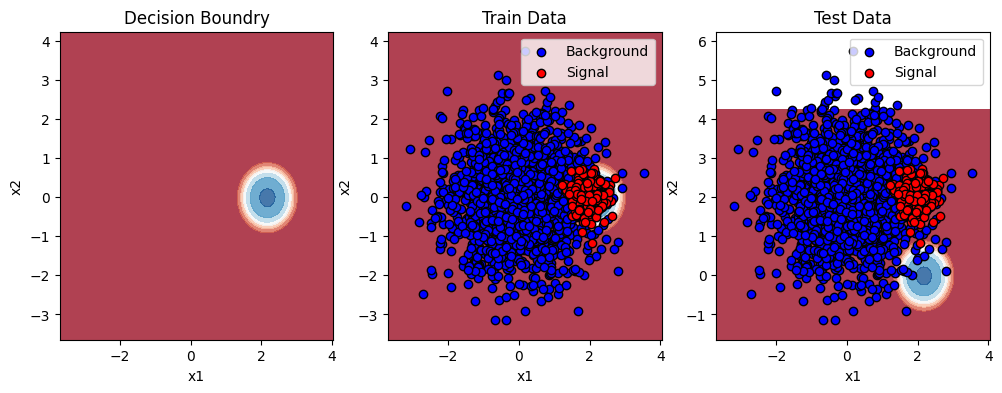

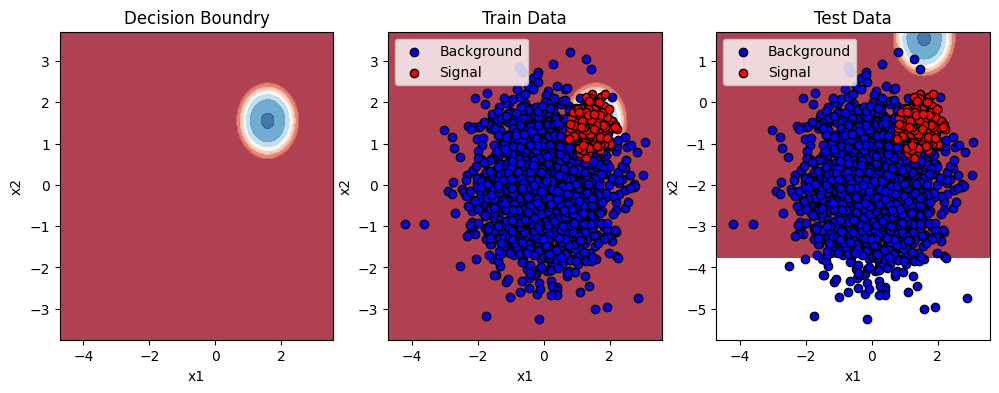

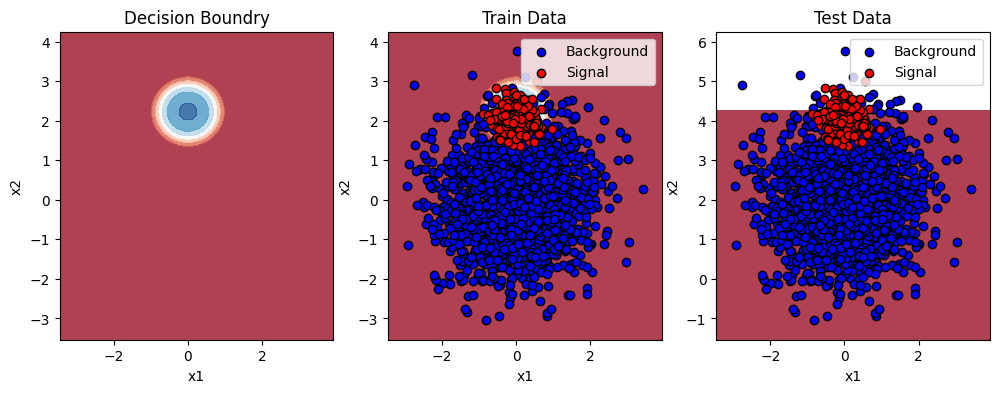

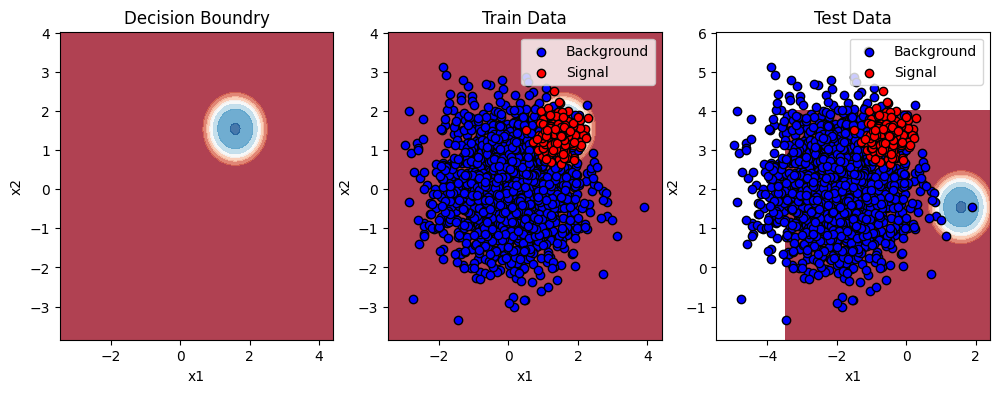

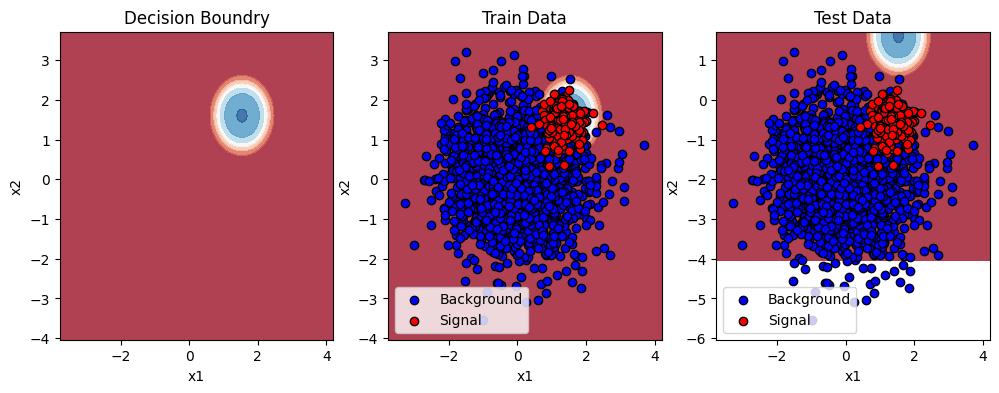

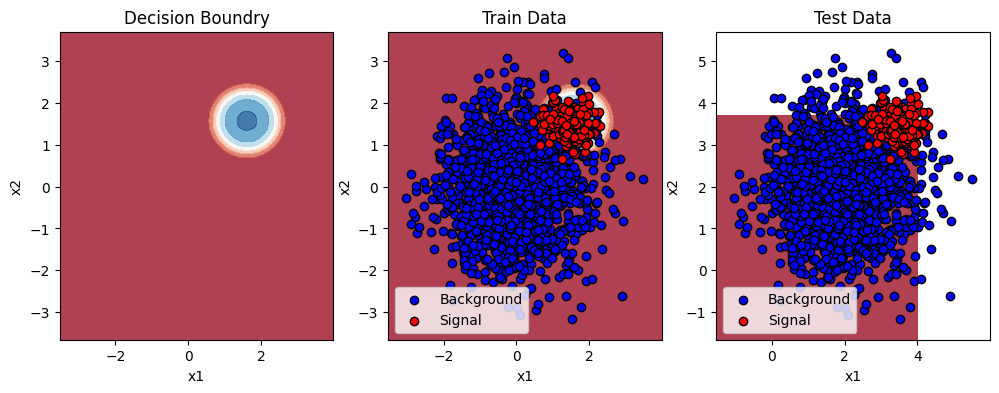

In [23]:
visualize_decicion_boundary(naive_bayes_models, train_sets, test_sets)

### Preprocessing
We preprocess the test set before doing predictions

**Load Model**

In [24]:
# Import Naive Bayes baseline
from naive_bayes import Model

**Load Data**

In [25]:
# Train set
X_Trains = [train_set["data"] for train_set in train_sets]
Y_Trains = [train_set["labels"] for train_set in train_sets]

# Test set
X_Tests = [test_set["data"] for test_set in test_sets]

**Preprocess Test Set**
- compute $z_0$
- subtract $z_0$ from test set

In [26]:
for index, _ in enumerate(train_sets):

    train_mean = np.mean(X_Trains[index]).values
    test_mean = np.mean(X_Tests[index]).values

    # Esitmate z0
    z0 = train_mean - test_mean

    X_Tests[index] = X_Tests[index] - z0

**Model Name**

In [27]:
# Load Trained model 
trained_naive_model_name = model_dir + data_name + "_naive" # Model Name to load trained model
# my_naive_model = naive_bayes_model.load(trained_naive_model_name) # Reload saved model                    

**Train and Get Predictions**

In [28]:
naive_bayes_models = []

pre_nb_Y_hat_tests, pre_nb_Y_hat_score_tests = [], []
for index, _ in enumerate(X_Trains):

    # Load Model
    naive_bayes_model = Model()

    # Train model if not trained
    if not(naive_bayes_model.is_trained):
        naive_bayes_model.fit(X_Trains[index], Y_Trains[index]) 

    # Get Predictions
    pre_nb_Y_hat_tests.append(naive_bayes_model.predict(X_Tests[index]))
    # Get Scores
    pre_nb_Y_hat_score_tests.append(naive_bayes_model.predict_score(X_Tests[index]))

    naive_bayes_models.append(naive_bayes_model)

**Save Model**

In [29]:
# Save Model
naive_bayes_models[0].save(trained_naive_model_name)

**Save Predictions**

In [30]:
# result directory 
predictions_dir = os.path.join(result_dir, "preprocess_naive_bayes")

# create result directory if not created
if not os.path.exists(predictions_dir):
    os.mkdir(predictions_dir) 


for index, _ in enumerate(nb_Y_hat_tests) :

    # prediction file name
    prediction_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")

    # score file name
    score_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".scores")
    
    # save prediction
    write(prediction_name, pre_nb_Y_hat_tests[index])

    # save score
    write(score_name, pre_nb_Y_hat_score_tests[index])

**Decision Boundary**

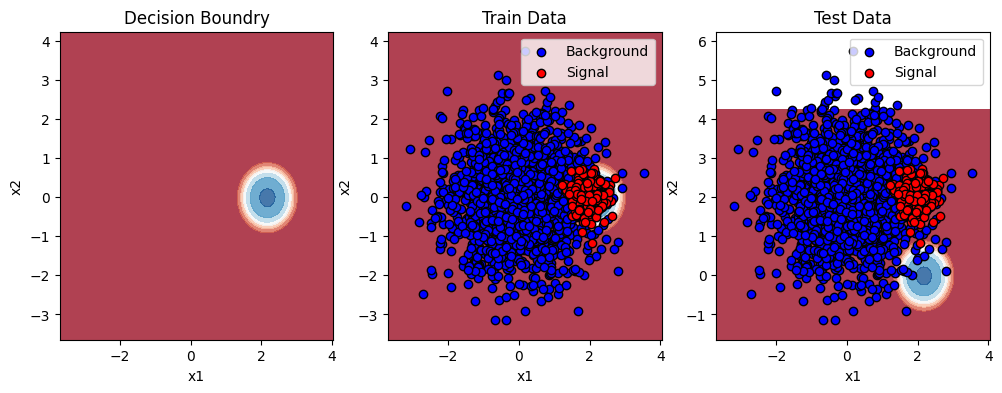

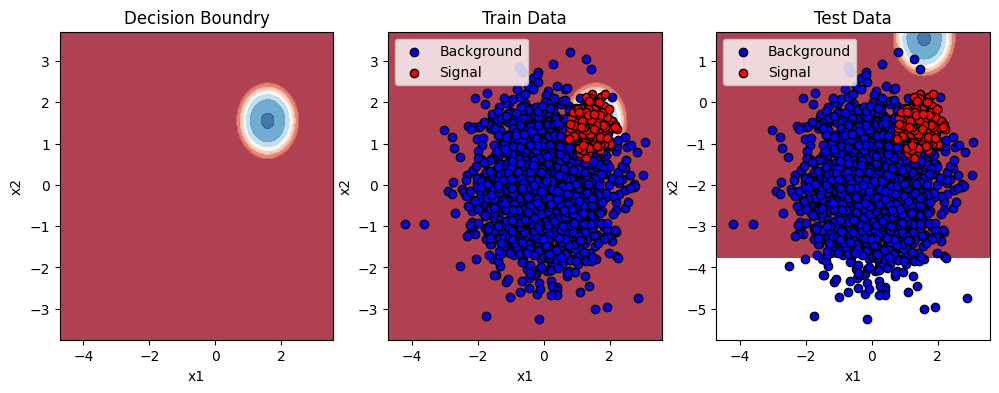

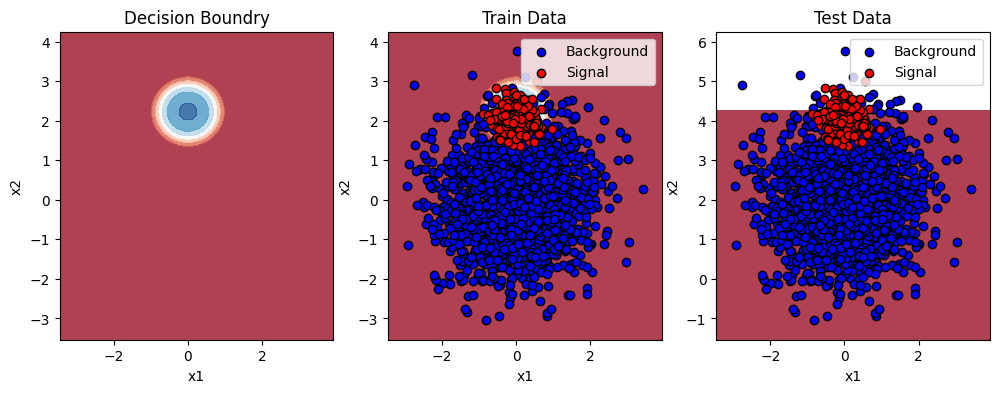

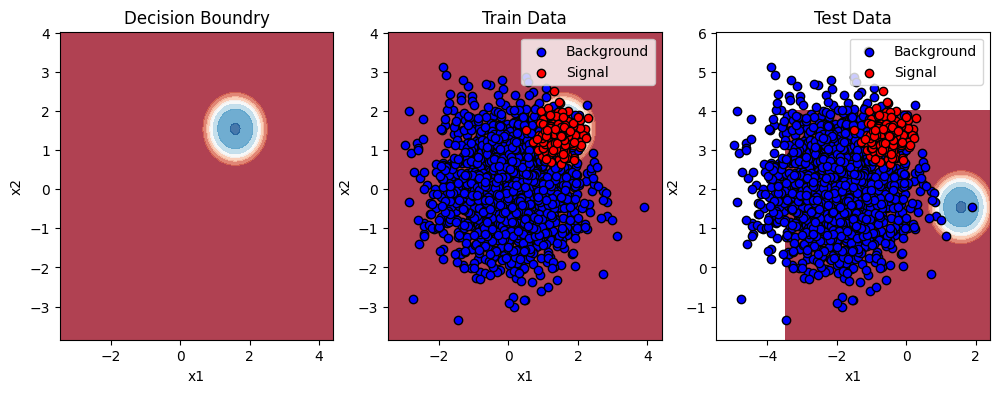

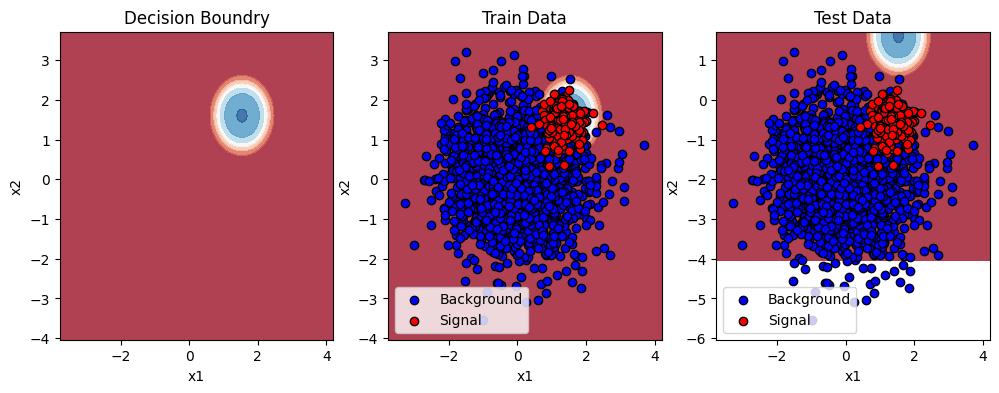

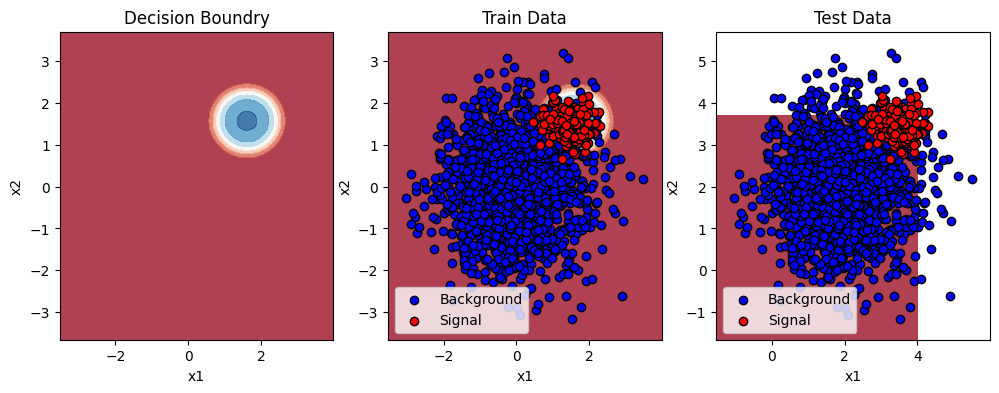

In [31]:
visualize_decicion_boundary(naive_bayes_models, train_sets, test_sets)

### Data Augmentation
Here we have a Naive Bayes Model which trains on the augmented train datasets and is tested on all three test sets.

**Data Augmentation**  
To augment our data, we estimate the nuissance vector $z_0$ and modify it by a random scalar $\alpha$ such that   
$z_0 = \alpha * z_0$

In [32]:
from augment_data import get_augmented_data

**Load Model**

In [33]:
# Import Naive Bayes baseline
from augmented_naive_bayes import Model

**Load Data**

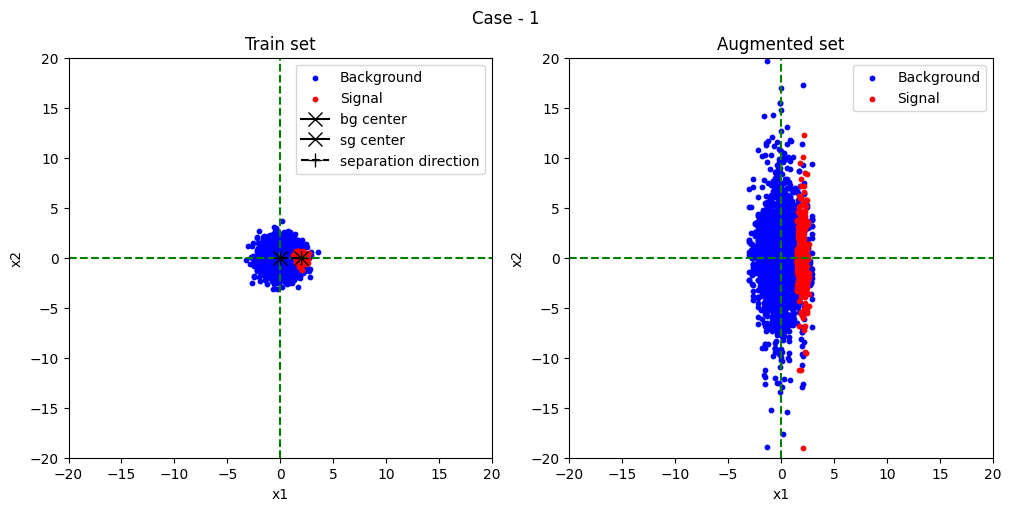

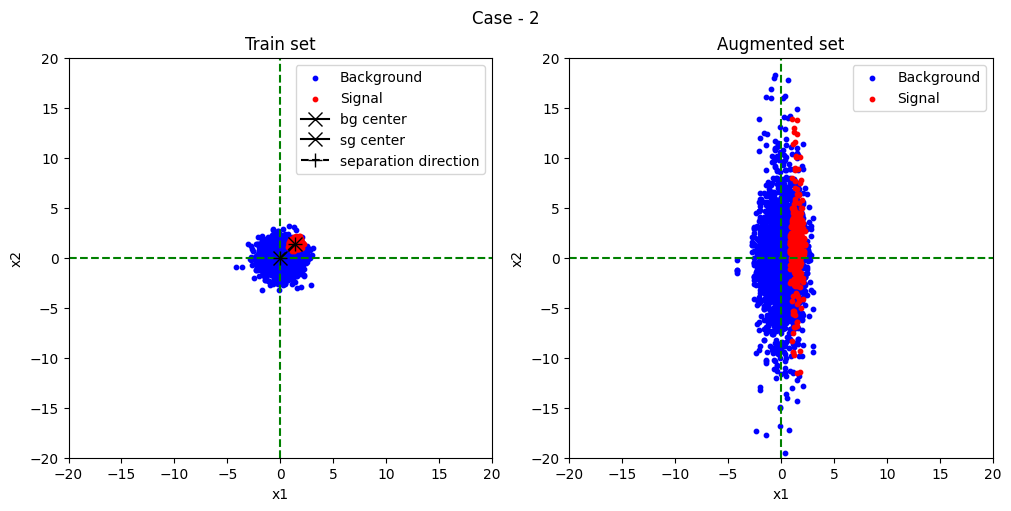

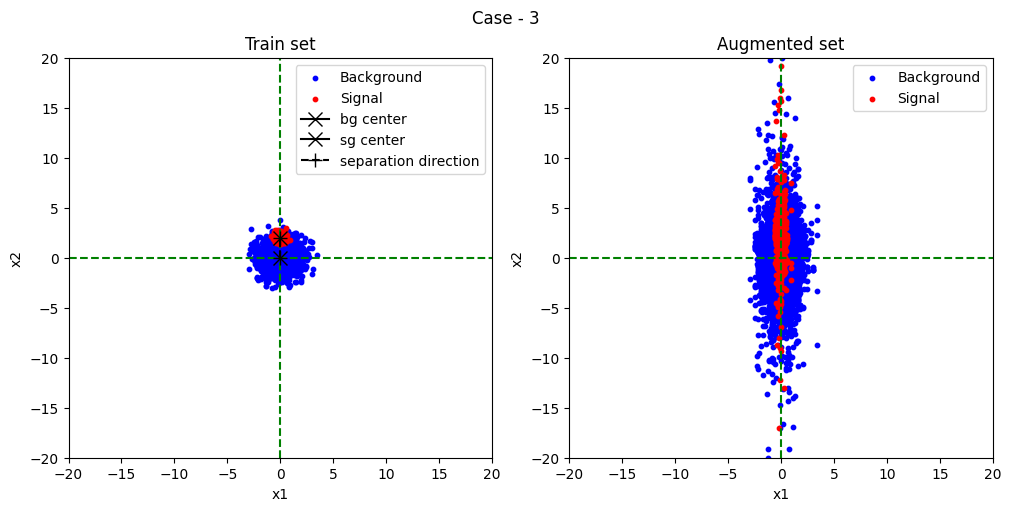

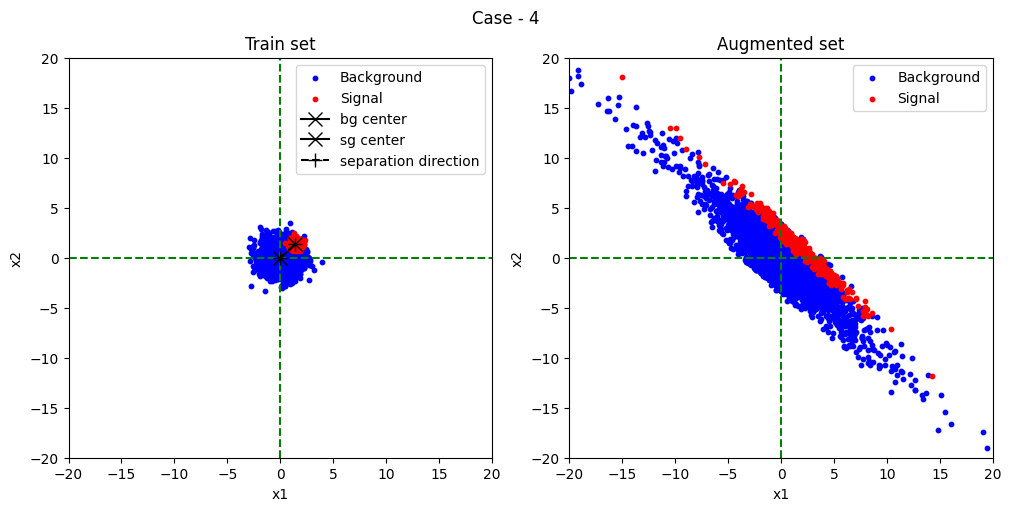

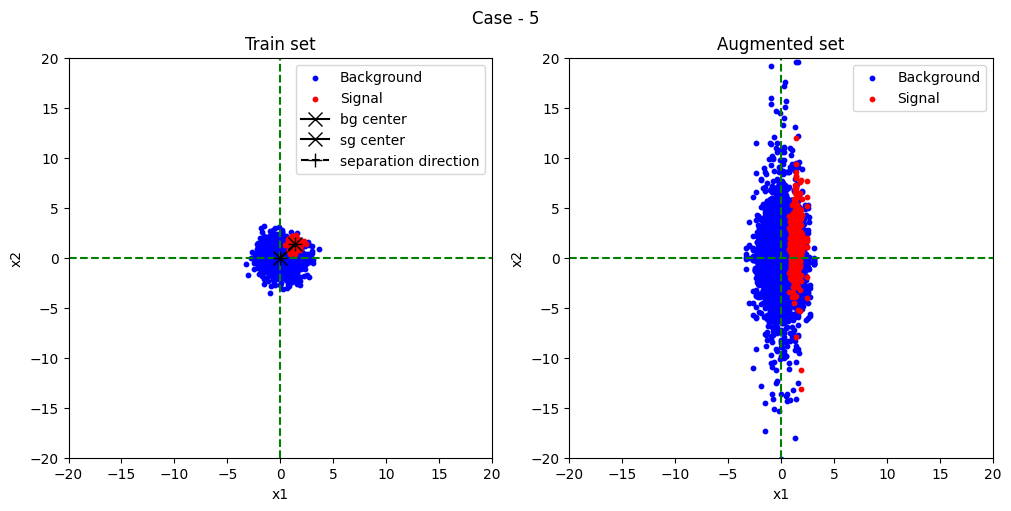

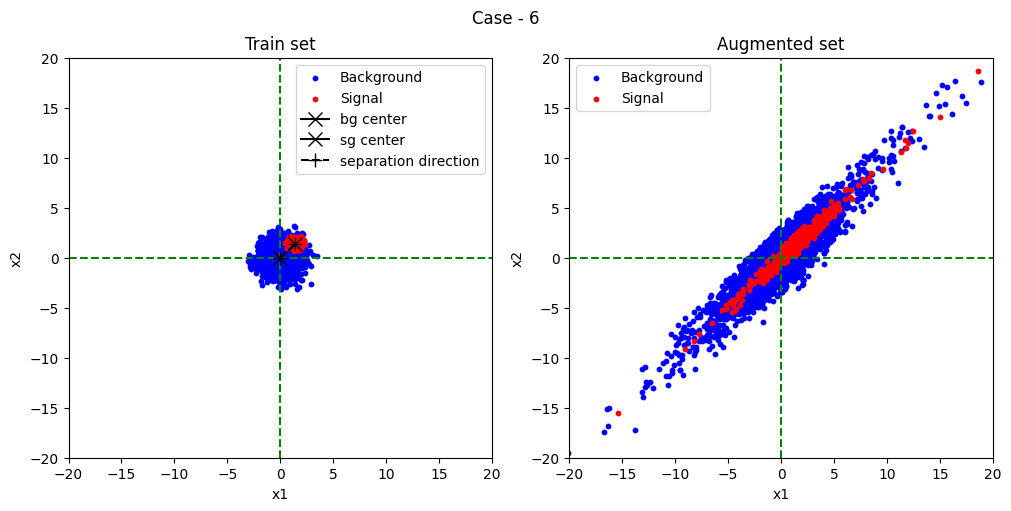

In [34]:
X_Trains, Y_Trains, X_Tests = [],[],[]
for i, _ in enumerate(train_sets):
    augmented_set = get_augmented_data(train_sets[i],  test_sets[i])
 
    visualize_augmented_data(settings[i], train_sets[i], augmented_set)

    # Train set
    X_Trains.append(augmented_set["data"])
    Y_Trains.append(augmented_set["labels"])

    # Test set
    X_Tests.append(test_sets[i]["data"])

**Train Model**

In [35]:
# Load Trained model 
trained_augmented_naive_model_name = model_dir + data_name + "_augmented_naive" # Model Name to load trained model
# my_naive_model = naive_bayes_model.load(trained_naive_model_name) # Reload saved model                     

**Get Predictions**

In [36]:
aug_nb_Y_hat_tests, aug_nb_Y_hat_score_tests = [], []
augmented_naive_bayes_models = []
for index, _ in enumerate(X_Trains):

    # Load Model
    augmented_naive_bayes_model = Model()

    # Train model if not trained
    if not(augmented_naive_bayes_model.is_trained):
        augmented_naive_bayes_model.fit(X_Trains[index], X_Tests[index], Y_Trains[index]) 

    # Get Predictions
    aug_nb_Y_hat_tests.append(augmented_naive_bayes_model.predict(X_Tests[index]))
    # Get Scores
    aug_nb_Y_hat_score_tests.append(augmented_naive_bayes_model.predict_score(X_Tests[index]))
    augmented_naive_bayes_models.append(augmented_naive_bayes_model)


**Save Model**

In [37]:
# Save Model
augmented_naive_bayes_models[0].save(trained_augmented_naive_model_name)

**Save Predictions**

In [38]:
# result directory 
predictions_dir = os.path.join(result_dir, "augmented_naive_bayes")

# create result directory if not created
if not os.path.exists(predictions_dir):
    os.mkdir(predictions_dir) 


for index, _ in enumerate(aug_nb_Y_hat_tests) :
    # prediction file name
    prediction_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")

    # score file name
    score_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".scores")
    
    # save prediction
    write(prediction_name, aug_nb_Y_hat_tests[index])

    # save score
    write(score_name, aug_nb_Y_hat_score_tests[index])

**Decision Boundary**

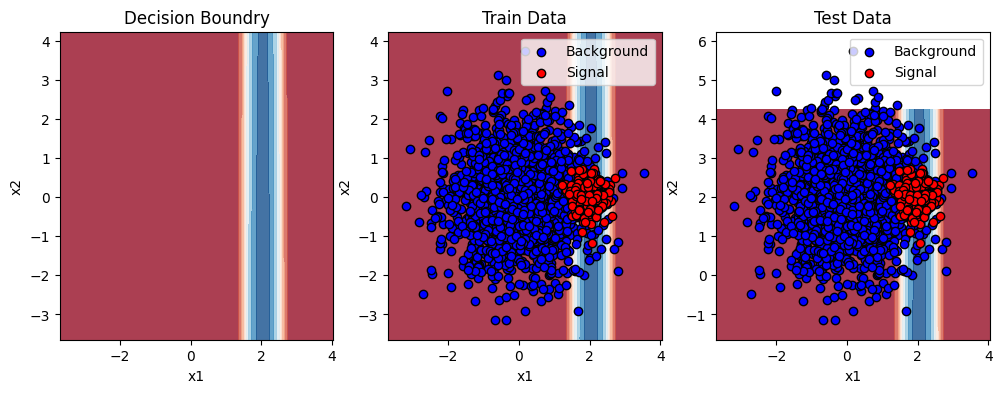

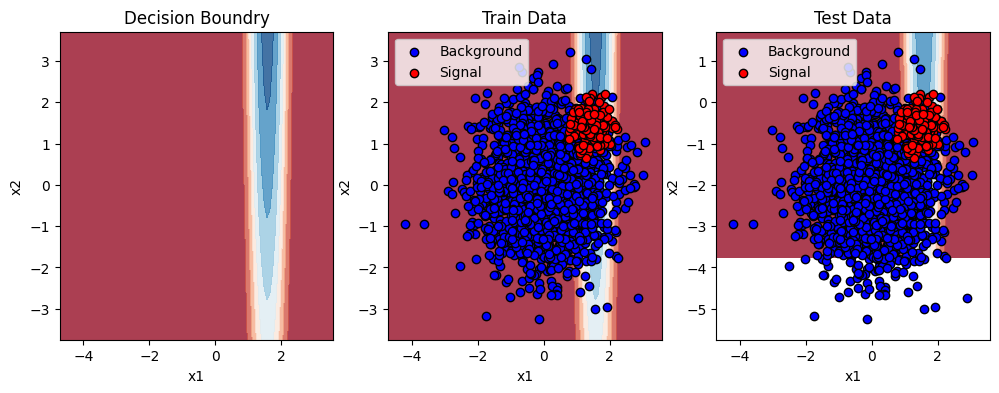

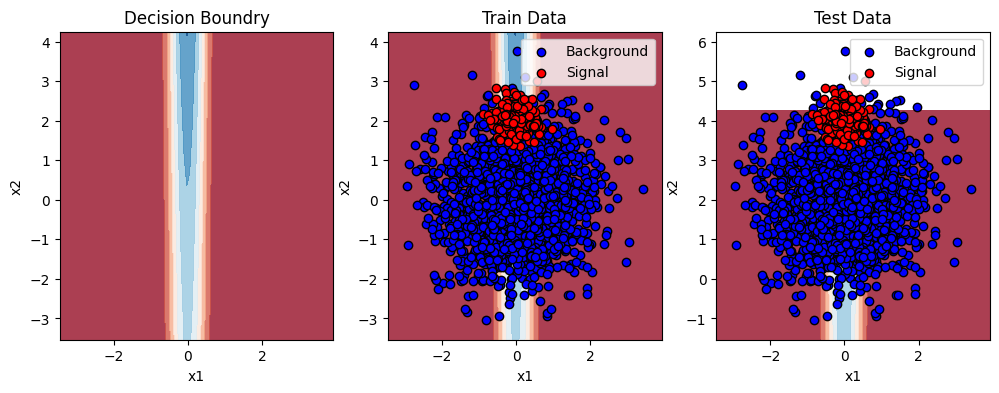

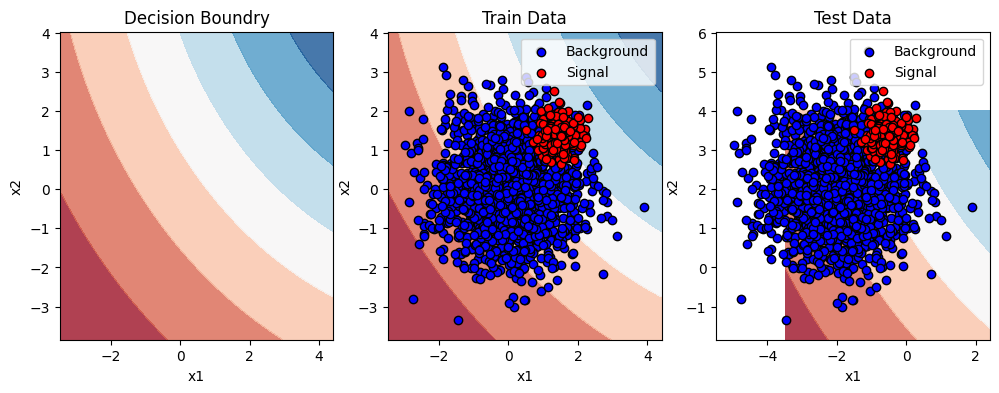

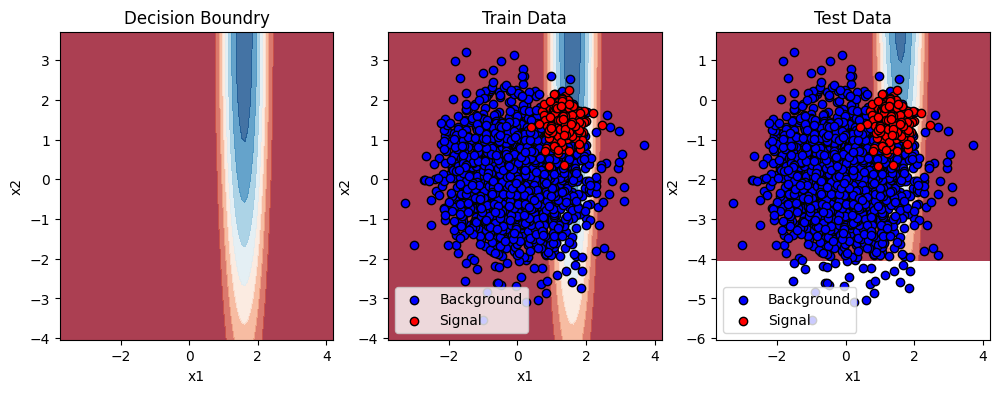

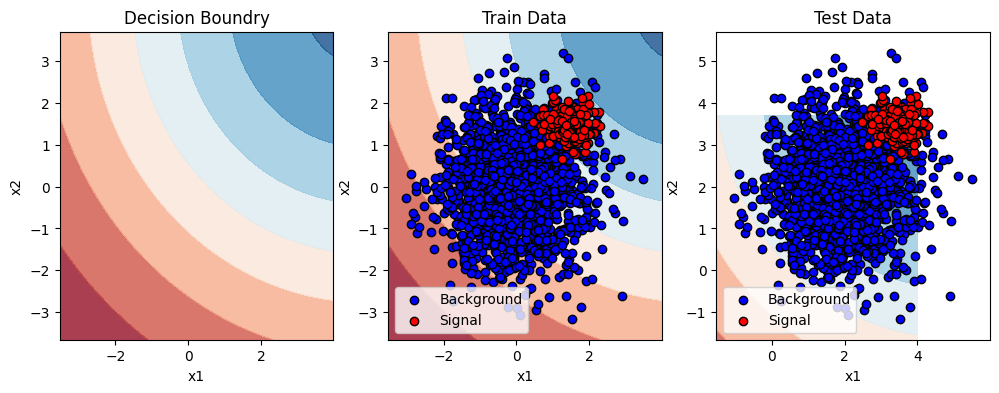

In [39]:
visualize_decicion_boundary(augmented_naive_bayes_models, train_sets, test_sets)

***
# 3 - Scoring
***

In this section, we evaluate the two baselines using AUC score. AUC stands for "Area Under the Curve". And the curve under which we measure the area is the ROC curve (Receiver Operating Characteristic curve). For two-classes classification, this curve is the plot of the true positive rate (TPR) as a function of the false positive rate (FPR) for all the values of a decision threshold.

**True Positive Rate**  (**TPR**) is a synonym for recall and is therefore defined as follows:
$$
TPR = \frac{TP}{TP+FN}
$$
**False Positive Rate**  (**FPR**) is defined as follows:
$$
FPR = \frac{FP}{FP+TN}
$$

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg" width="400"/>
<br>
ROC Curve showing TPR vs. FPR at different classification thresholds
</div>

For example, if we assume that a model's output is kind of a probability (a real number between $0$ and $1$) that the input is in signal class, then you can set a threshold $t$, and decide to classify an input as signal iff the ouput probility is greater than $t$. For each value of $t$, this defines both a TPR($t$) and a FPR($t$). Then the points of the ROC curve have coordinates (FPR($t$),TPR($t$)) for all $t$ between $0$ and $1$.

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg" width="400"/>
<br>
AUC (Area under the ROC Curve)
</div>

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

Source : https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=fr

In [40]:
from metric import auc_metric, bac_metric

In [41]:
# Test labels
Y_Tests = [test_set["labels"] for test_set in test_sets]

In [42]:

auc_scores , bac_scores = [], []

for index in range(len(constant_Y_hat_tests)) :

    # Constant predictions
    prediction_name = os.path.join(result_dir, "dumb", "test_"+ str(index+1) + ".predictions")
    score_name = os.path.join(result_dir, "dumb", "test_"+ str(index+1) + ".scores")
    constant_Y_hat_test = pd.read_csv(prediction_name, header=None)
    constant_Y_hat_score_test = pd.read_csv(score_name, header=None)
    constant_bac = auc_metric(Y_Tests[index], constant_Y_hat_test)
    constant_auc = auc_metric(Y_Tests[index], constant_Y_hat_score_test)
    

    # Naive predictions
    prediction_name = os.path.join(result_dir, "naive_bayes", "test_"+ str(index+1) + ".predictions")
    score_name = os.path.join(result_dir, "naive_bayes", "test_"+ str(index+1) + ".scores")
    naive_Y_hat_test = pd.read_csv(prediction_name, header=None)
    naive_Y_hat_score_test = pd.read_csv(score_name, header=None)
    naive_bac = bac_metric(Y_Tests[index], naive_Y_hat_test)
    naive_auc = auc_metric(Y_Tests[index], naive_Y_hat_score_test)


    # Preprocessing predictions
    prediction_name = os.path.join(result_dir, "preprocess_naive_bayes", "test_"+ str(index+1) + ".predictions")
    score_name = os.path.join(result_dir, "preprocess_naive_bayes", "test_"+ str(index+1) + ".scores")
    pre_naive_Y_hat_test = pd.read_csv(prediction_name, header=None)
    pre_naive_Y_hat_score_test = pd.read_csv(score_name, header=None)
    pre_naive_bac = bac_metric(Y_Tests[index], pre_naive_Y_hat_test)
    pre_naive_auc = auc_metric(Y_Tests[index], pre_naive_Y_hat_score_test)

   

    # Augmented Naive predictions
    prediction_name = os.path.join(result_dir, "augmented_naive_bayes", "test_"+ str(index+1) + ".predictions")
    score_name = os.path.join(result_dir, "augmented_naive_bayes", "test_"+ str(index+1) + ".scores")
    augmented_naive_Y_hat_test = pd.read_csv(prediction_name, header=None)
    augmented_naive_Y_hat_score_test = pd.read_csv(score_name, header=None)
    augmented_naive_bac = bac_metric(Y_Tests[index], augmented_naive_Y_hat_test)
    augmented_naive_auc = auc_metric(Y_Tests[index], augmented_naive_Y_hat_score_test)
    
    auc_scores.append([constant_bac, naive_auc, pre_naive_auc, augmented_naive_auc])
    bac_scores.append([constant_auc, naive_bac, pre_naive_bac, augmented_naive_bac])



In [43]:
score_auc_df = pd.DataFrame({
        "test_set 1": auc_scores[0],
        "test_set 2": auc_scores[1], 
        "test_set 3": auc_scores[2], 
        "test_set 4": auc_scores[3],
        "test_set 5": auc_scores[4],
        "test_set 6": auc_scores[5]
    },index = [
        "constant model", 
        "naive bayes",
        "preprocessing",
        "data augmentation"
    ]
)

score_bac_df = pd.DataFrame({
        "test_set 1": bac_scores[0],
        "test_set 2": bac_scores[1], 
        "test_set 3": bac_scores[2], 
        "test_set 4": bac_scores[3],
        "test_set 5": bac_scores[4],
        "test_set 6": bac_scores[5]
    },index = [
        "constant model", 
        "naive bayes",
        "preprocessing",
        "data augmentation"
    ]
)
score_auc_df["avg_auc"] = score_auc_df.iloc[:, 0:6].mean(axis=1)
score_bac_df["avg_bac"] = score_bac_df.iloc[:, 0:6].mean(axis=1)
score_auc_df.to_csv("scoring_output/auc.csv")
score_bac_df.to_csv("scoring_output/bac.csv")

In [44]:
score_auc_df

,test_set 1,test_set 2,test_set 3,test_set 4,test_set 5,test_set 6,avg_auc
constant model,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
naive bayes,0.875092,0.963604,0.178864,0.802970,0.970907,0.059832,0.641878
preprocessing,0.757529,0.948291,0.035137,0.678495,0.955525,0.033532,0.568085
data augmentation,0.979266,0.952786,0.841692,0.965089,0.962289,0.981217,0.947057


In [45]:
score_bac_df

,test_set 1,test_set 2,test_set 3,test_set 4,test_set 5,test_set 6,avg_bac
constant model,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
naive bayes,0.497778,0.499722,0.387778,0.499444,0.500000,0.387222,0.461991
preprocessing,0.500000,0.500000,0.468889,0.500000,0.500000,0.499444,0.494722
data augmentation,0.890646,0.499167,0.500000,0.500000,0.512007,0.500000,0.566970


***
# 4 - Submissions
***

### Unit Testing 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

**Test Ingestion Program**

In [46]:
!python3 $problem_dir/ingestion.py

############################################
### Ingestion Program
############################################


###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  ./sample_data
[*] train data dir :  ./sample_data/train/data
[*] train labels dir :  ./sample_data/train/labels
[*] test data dir :  ./sample_data/test/data
[*] test labels dir :  ./sample_data/test/labels
[+] train data dir found
[+] train labels dir found
[+] test data dir found
[+] test labels dir found
[+] 6 train and test sets found
---------------------------------
[+] Train and Test data loaded!
---------------------------------



[*] Dataset : 1
-----------
[*] Loading Model
[*] Training Model
[*] Making Predictions
[*] Saving Predictions
[*] Saving Scores

[*] Dataset : 2
-----------
[*] Loading Model
[*] Training Model
[*] Making Predictions
[*] Saving Predictions
[*] Saving Scores

[*] Dataset : 3
-----------
[*] Loading Model
[*] Training Mo

**Test Scoring Program**

In [47]:
!python3 $score_dir/score.py

############################################
### Scoring Program
############################################
[*] Reading predictions and solutions
[*] Predictions files : ['test_6.predictions', 'test_3.predictions', 'test_5.predictions', 'test_2.predictions', 'test_4.predictions', 'test_1.predictions']
[*] Score files : ['test_3.scores', 'test_1.scores', 'test_5.scores', 'test_2.scores', 'test_4.scores', 'test_6.scores']
[*] Solutions files : ['test_3.labels', 'test_1.labels', 'test_5.labels', 'test_2.labels', 'test_4.labels', 'test_6.labels']
[+] 6 prediction, score, solution files found
---------------------------------
[+] Predictions and Solution files loaded!
---------------------------------


[*] Computing AUC and BAC scores

Test set 1
-----------
AUC: 0.8750921273031826
BAC: 0.49777777777777776

Test set 2
-----------
AUC: 0.9636041317699608
BAC: 0.49972222222222223

Test set 3
-----------
AUC: 0.17886376326074815
BAC: 0.3877777777777778

Test set 4
-----------
AUC: 0.8029704

### Prepare the submission

In [48]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_23-03-06-19-19.zip
../sample_result_submission_23-03-06-19-19.zip
